In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)


TensorBoard version:  2.9.1


In [18]:
gmae_v1_hidden_256_l_2 = pd.read_csv('./visu/run-bikeguessr_2022_06_24_02_36_18_0-tag-F1_test.csv')
gmae_v1_hidden_256_l_2['params'] = 'hidden:256_layers:2'
gmae_v1_hidden_256_l_2['run'] = 'v1'
gmae_v2_hidden_512_l_3 = pd.read_csv('./visu/run-bikeguessr_2022_06_24_18_20_22_0-tag-F1_test.csv')
gmae_v2_hidden_512_l_3['params'] = 'hidden:512_layers:3'
gmae_v2_hidden_512_l_3['run'] = 'v2'
gmae_v3_hidden_128_l_2 = pd.read_csv('./visu/run-bikeguessr_2022_06_25_16_07_03_0-tag-F1_test.csv')
gmae_v3_hidden_128_l_2['params'] = 'hidden:128_layers:2'
gmae_v3_hidden_128_l_2['run'] = 'v3'
gmae_v4_hidden_64_l_4 = pd.read_csv('./visu/run-bikeguessr_2022_06_25_18_40_35_0-tag-F1_test.csv')
gmae_v4_hidden_64_l_4['params'] = 'hidden:64_layers:4'
gmae_v4_hidden_64_l_4['run'] = 'v4'

gmae_v3_train_loss = pd.read_csv('./visu/run-bikeguessr_2022_06_25_16_07_03_0-tag-Loss_train.csv')

In [19]:
runs = pd.concat([
    gmae_v1_hidden_256_l_2,
    gmae_v2_hidden_512_l_3,
    gmae_v3_hidden_128_l_2,
    gmae_v4_hidden_64_l_4
], ignore_index=True)

In [20]:
runs

,Wall time,Step,Value,params,run
0,1.656031e+09,3,0.736420,hidden:256_layers:2,v1
1,1.656031e+09,7,0.735388,hidden:256_layers:2,v1
2,1.656031e+09,11,0.734185,hidden:256_layers:2,v1
3,1.656032e+09,15,0.733419,hidden:256_layers:2,v1
4,1.656032e+09,19,0.732176,hidden:256_layers:2,v1
...,...,...,...,...,...
195,1.656183e+09,183,0.727781,hidden:64_layers:4,v4
196,1.656183e+09,187,0.728036,hidden:64_layers:4,v4
197,1.656184e+09,191,0.728330,hidden:64_layers:4,v4
198,1.656184e+09,195,0.729379,hidden:64_layers:4,v4


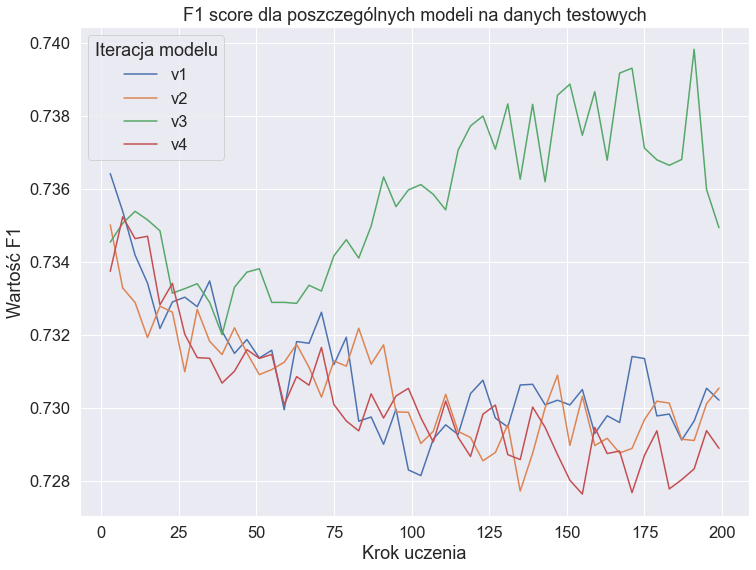

In [45]:
#plt.figure(figsize=(12, 9))
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
test_f1 = sns.lineplot(data=runs, x="Step", y="Value", hue="run", ax=ax)
test_f1.set(title='F1 score dla poszczególnych modeli na danych testowych')
test_f1.set(xlabel='Krok uczenia')
test_f1.set(ylabel='Wartość F1')
fontsize = 18
plt.legend(loc="upper left", frameon=True, title='Iteracja modelu')
test_f1
fig.savefig("./visu/" + 'gmae_f1_test.png')

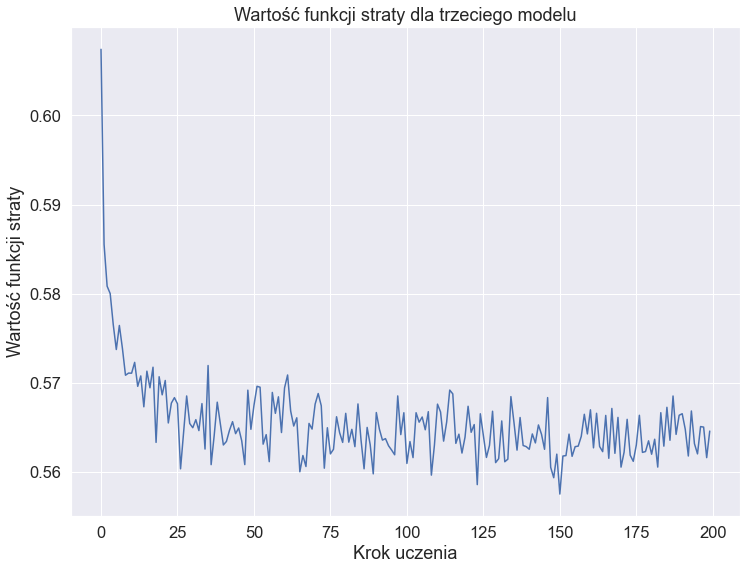

In [46]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
train_loss = sns.lineplot(data=gmae_v3_train_loss, x="Step", y="Value")
train_loss.set(title='Wartość funkcji straty dla trzeciego modelu')
train_loss.set(xlabel='Krok uczenia')
train_loss.set(ylabel='Wartość funkcji straty')
train_loss
fig.savefig("./visu/" + 'gmae_loss_train.png')